LGBMをtrainする際に各roundで  

- era毎のcorr  
- feature exposure  

を計算した. このデータを用いて学習の際のさらなる工夫案を探す.

In [52]:
import seaborn as sns
import csv
import itertools, logging, joblib
NOTE_NAME = "lgbm1"

In [3]:
ROUND = "237"
TOURNAMENT_NAME = "kazutsugi"
TARGET_NAME = f"target_{TOURNAMENT_NAME}"
PREDICTION_NAME = f"prediction_{TOURNAMENT_NAME}"

In [36]:
val_loss = [pd.read_hdf(file) for file in sorted(glob("lgbm1/val_metrics*"))]

In [40]:
val_loss_min = np.array([[i,m.min()[0]] for i,m in enumerate(val_loss)])

In [47]:
MODEL = np.argmin(val_loss_min[:, 1])
MODEL

19

In [48]:
val_loss[MODEL].min()

mse    0.124742
dtype: float64

In [51]:
# load train log
corrByEra = pd.read_hdf(f"lgbm1/corr_by_era_{MODEL}.hdf")
val_corrByEra = pd.read_hdf(f"lgbm1/val_corr_by_era_{MODEL}.hdf")

fexp = pd.read_hdf(f"lgbm1/exposures_{MODEL}.hdf")
val_fexp = pd.read_hdf(f"lgbm1/val_exposures_{MODEL}.hdf")

loss = pd.read_hdf(f"lgbm1/metrics_{MODEL}.hdf")
val_loss = pd.read_hdf(f"lgbm1/val_metrics_{MODEL}.hdf")

model = joblib.load(f"lgbm1/lgbReg_{MODEL}.pkl")

---

In [54]:
corrByEra.head(2)  # 各eraのcorrをeposhごとに算出

,era1,era10,era100,era101,era102,era103,era104,era105,era106,era107,era108,era109,era11,era110,era111,era112,era113,era114,era115,era116,era117,era118,era119,era12,era120,era13,era14,era15,era16,era17,era18,era19,era2,era20,era21,era22,era23,era24,era25,era26,era27,era28,era29,era3,era30,era31,era32,era33,era34,era35,era36,era37,era38,era39,era4,era40,era41,era42,era43,era44,era45,era46,era47,era48,era49,era5,era50,era51,era52,era53,era54,era55,era56,era57,era58,era59,era6,era60,era61,era62,era63,era64,era65,era66,era67,era68,era69,era7,era70,era71,era72,era73,era74,era75,era76,era77,era78,era79,era8,era80,era81,era82,era83,era84,era85,era86,era87,era88,era89,era9,era90,era91,era92,era93,era94,era95,era96,era97,era98,era99
0,0.0355784,0.0657698,0.0363458,0.00870552,0.00695742,-0.0125636,0.0097017,0.0987686,0.00802008,0.0284626,0.0815287,0.0663283,0.0580493,0.00184704,0.0430049,0.0319908,0.0443457,0.0669247,0.0834501,0.000954255,0.0380081,0.0360477,0.0278132,0.0931454,0.0470414,0.0621954,0.0458956,0.0580764,0.110736,0.0371,0.0229776,0.0403339,0.0462694,0.0619089,0.030028,0.0666293,0.0828159,0.0590824,0.0214628,0.025614,0.022367,0.0614754,0.0426327,0.0275014,0.0576826,0.0396649,0.0233478,0.0382084,0.0442013,0.0451499,0.072347,0.051306,0.052228,0.050211,0.0667985,0.0233892,0.012539,0.0108618,0.0548801,0.0503398,0.0791537,0.01325,0.0381697,0.0545834,0.0252571,0.0735546,0.00914943,0.0562697,0.0500428,0.0391661,0.0492513,0.0497376,0.0429853,0.0260712,0.00103448,0.0515195,0.060618,0.023005,0.0806683,0.0376414,0.0799334,0.0797405,0.0354702,0.0382922,0.0252459,-0.0228884,-0.0192604,0.0372411,0.0229307,0.0432724,0.0803444,0.0355182,0.0638221,0.0425419,0.0846922,0.0746399,0.0385203,0.0162007,0.0757697,0.0354906,0.0112196,0.0464747,0.0873292,0.0226863,0.00518743,0.0770287,0.0417501,0.038665,0.00917843,0.000998264,0.0624721,0.00419361,0.0661067,0.0418325,0.0556349,0.0317918,0.065781,0.059165,0.0544912,0.0323841
1,0.0578114,0.0863256,0.0540377,0.0122844,0.0448778,-0.0291376,0.00275146,0.126427,0.0184839,0.023708,0.100467,0.0828337,0.0446663,0.0121395,0.0443353,0.0305717,0.0199793,0.0583653,0.0992824,0.0186322,0.0541542,0.034642,0.0273737,0.0938394,0.0665049,0.0714627,0.0549891,0.048344,0.105798,0.0419768,0.0386674,0.0303131,0.0724093,0.0796433,0.0437815,0.0959017,0.0947103,0.0823733,0.0385779,0.0199278,0.0167015,0.0670838,0.0441428,0.0549418,0.0601474,0.0550933,0.0218,0.0378707,0.0456372,0.0565703,0.0913405,0.0491285,0.0623605,0.0499718,0.0950993,0.0270784,0.0263258,0.0266571,0.0550759,0.0667171,0.0840042,0.0117468,0.0469171,0.07973,0.0383797,0.0697651,0.0272934,0.064671,0.05804,0.046265,0.061116,0.0539801,0.0559706,0.0370973,-0.00633376,0.0596358,0.0751616,0.0181339,0.097138,0.0303969,0.088493,0.0895373,0.032245,0.0318656,0.0367537,-0.0278669,-0.00944377,0.0385887,0.0426376,0.0606703,0.0955748,0.0316456,0.0785238,0.0562529,0.0916814,0.0951928,0.0367097,0.0253358,0.0782823,0.0282018,0.0434748,0.0608873,0.11246,0.0249172,0.0131473,0.080875,0.0540303,0.0399664,0.0269803,0.00416272,0.0868209,-0.00373108,0.0803932,0.0549285,0.0571987,0.0465353,0.0756858,0.0771008,0.0535121,0.0418858


In [184]:
fexp.head(2)  # 各featureのexposureを各epochごとに算出

,feature_charisma1,feature_charisma10,feature_charisma11,feature_charisma12,feature_charisma13,feature_charisma14,feature_charisma15,feature_charisma16,feature_charisma17,feature_charisma18,feature_charisma19,feature_charisma2,feature_charisma20,feature_charisma21,feature_charisma22,feature_charisma23,feature_charisma24,feature_charisma25,feature_charisma26,feature_charisma27,feature_charisma28,feature_charisma29,feature_charisma3,feature_charisma30,feature_charisma31,feature_charisma32,feature_charisma33,feature_charisma34,feature_charisma35,feature_charisma36,feature_charisma37,feature_charisma38,feature_charisma39,feature_charisma4,feature_charisma40,feature_charisma41,feature_charisma42,feature_charisma43,feature_charisma44,feature_charisma45,feature_charisma46,feature_charisma47,feature_charisma48,feature_charisma49,feature_charisma5,feature_charisma50,feature_charisma51,feature_charisma52,feature_charisma53,feature_charisma54,feature_charisma55,feature_charisma56,feature_charisma57,feature_charisma58,feature_charisma59,feature_charisma6,feature_charisma60,feature_charisma61,feature_charisma62,feature_charisma63,feature_charisma64,feature_charisma65,feature_charisma66,feature_charisma67,feature_charisma68,feature_charisma69,feature_charisma7,feature_charisma70,feature_charisma71,feature_charisma72,feature_charisma73,feature_charisma74,feature_charisma75,feature_charisma76,feature_charisma77,feature_charisma78,feature_charisma79,feature_charisma8,feature_charisma80,feature_charisma81,feature_charisma82,feature_charisma83,feature_charisma84,feature_charisma85,feature_charisma86,feature_charisma9,feature_constitution1,feature_constitution10,feature_constitution100,feature_constitution101,feature_constitution102,feature_constitution103,feature_constitution104,feature_constitution105,feature_constitution106,feature_constitution107,feature_constitution108,feature_constitution109,feature_constitution11,feature_constitution110,feature_constitution111,feature_constitution112,feature_constitution113,feature_constitution114,feature_constitution12,feature_constitution13,feature_constitution14,feature_constitution15,feature_constitution16,feature_constitution17,feature_constitution18,feature_constitution19,feature_constitution2,feature_constitution20,feature_constitution21,feature_constitution22,feature_constitution23,feature_constitution24,feature_constitution25,feature_constitution26,feature_constitution27,feature_constitution28,feature_constitution29,feature_constitution3,feature_constitution30,feature_constitution31,feature_constitution32,feature_constitution33,feature_constitution34,feature_constitution35,feature_constitution36,feature_constitution37,feature_constitution38,feature_constitution39,feature_constitution4,feature_constitution40,feature_constitution41,feature_constitution42,feature_constitution43,feature_constitution44,feature_constitution45,feature_constitution46,feature_constitution47,feature_constitution48,feature_constitution49,feature_constitution5,feature_constitution50,feature_constitution51,feature_constitution52,feature_constitution53,feature_constitution54,feature_constitution55,feature_constitution56,feature_constitution57,feature_constitution58,feature_constitution59,feature_constitution6,feature_constitution60,feature_constitution61,feature_constitution62,feature_constitution63,feature_constitution64,feature_constitution65,feature_constitution66,feature_constitution67,feature_constitution68,feature_constitution69,feature_constitution7,feature_constitution70,feature_constitution71,feature_constitution72,feature_constitution73,feature_constitution74,feature_constitution75,feature_constitution76,feature_constitution77,feature_constitution78,feature_constitution79,feature_constitution8,feature_constitution80,feature_constitution81,feature_constitution82,feature_constitution83,feature_constitution84,feature_constitution85,feature_constitution86,feature_constitution87,feature_constitution88,feature_constitution8

In [59]:
loss.head(2)

,mse
0,0.124580
1,0.124557


---  
## 1.  [vs. epoch] loss, corr and maxFeatureExposure

In [67]:
np.argmin(val_loss)

41

### 主要指数まとめ

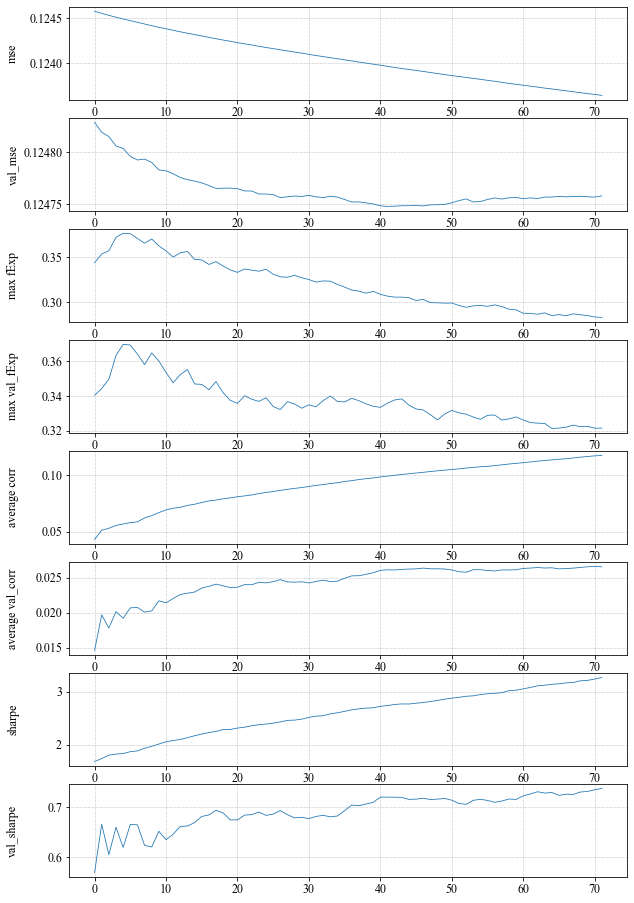

In [94]:
# epoch vs. **
fig,ax = plt.subplots(8, 1, figsize=(10, 16))
ax[0].plot(loss); ax[0].set_ylabel("mse")
ax[1].plot(val_loss); ax[1].set_ylabel("val_mse")
ax[2].plot(fexp.abs().max(axis=1)); ax[2].set_ylabel("max fExp")
ax[3].plot(val_fexp.abs().max(axis=1)); ax[3].set_ylabel("max val_fExp");
ax[4].plot(corrByEra.mean(axis=1)); ax[4].set_ylabel("average corr")
ax[5].plot(val_corrByEra.mean(axis=1)); ax[5].set_ylabel("average val_corr");
ax[6].plot(corrByEra.mean(axis=1) / corrByEra.std(axis=1)); ax[6].set_ylabel("sharpe")
ax[7].plot(val_corrByEra.mean(axis=1) / corrByEra.std(axis=1)); ax[7].set_ylabel("val_sharpe");
fig.align_ylabels()

分かること  
- epoch40付近が汎化損失の最小.この付近でcorrも極大となっている. しかしcorrの最大はepoch70. 必ずしも一致するわけではない.  
- 一方でfeatureExposureは10 ~ 20の早い段階で最大値近くまで上がったあと、じわじわ下がっていく. 
- corr, mse, featureExpの argmax/min は必ずしも一致しない.
- fExpの振る舞いは train/val でほとんど変化はない. (モデルが同じなのでこれはある程度自明.)  
- val_corrのargmaxは mseのargmax と大体一致しているが, val_sharpeはval_lossの上昇局面でもまだ収束していない!  
  ... これには意味がありそう  
  ... 例えば, モデルの安定度と収益の最大値にはトレードオフがあり、最大を求めるとmseの最小化(=corrの最大化)だが、安定を求めると 他の何かの極大化 となっている、とか?  
  ... もしかすると lossの最小phase以降には別のfeatureへのbetが大きくなるような学習が進んでいる?
  (... 確かにmax fExpはeposh40以降で減少の動きを見せている)

### category別exposure

In [83]:
feature_categories = fexp.columns.str.replace("[0-9]","").unique()

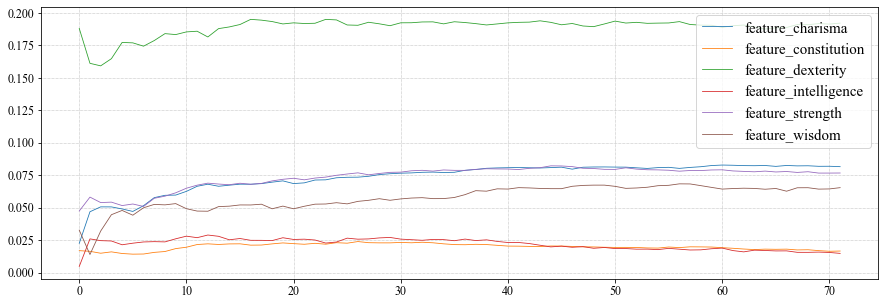

In [103]:
# epoch vs. val_|exposure| by category
pd.concat([val_fexp.loc[:, val_fexp.columns.str.contains(col)].mean(axis=1).abs().to_frame(col) for col in feature_categories], axis=1)\
.plot(figsize=(15, 5)); plt.legend(fontsize=(15));

fExpについて分かること:  
- dex >> charisma = strength > wisdom > intelligence = constitution  
- 各featureへのexposureはサチったあとには割と固定される  
- optunaで作ったmodelのimportanceもdexに集中していた.

雑感だが, 各feature or 各feature間の非線形な成分を抜き出すゲームなのでは...?  
自然にモデルを組む(正しいが、ポピュラーなlossを最小化する)と、いずれかのfeatureに大きくbetするモデルが完成してしまう感ある.  
lossを一工夫して、非線形だがリターンと相関のある特徴量を合成する方法はないのか.  
例えば線形成分を控除した上での予測値~リターンのMSEとか.    
既にあるモデルの予測値を控除のリターンの相関と
  
(当初は転移学習で既存モデルとの相関を低くしようと考えたが、それだと単に既存モデルと無相関になる気がした.)

幾何学の問題な気もしてきた...

---  
### 2.  [vs. Era]  

In [106]:
corrByEra.columns = corrByEra.columns.str.replace("[a-z]","").astype(int)
val_corrByEra.columns = val_corrByEra.columns.str.replace("[a-z]", "").astype(int)

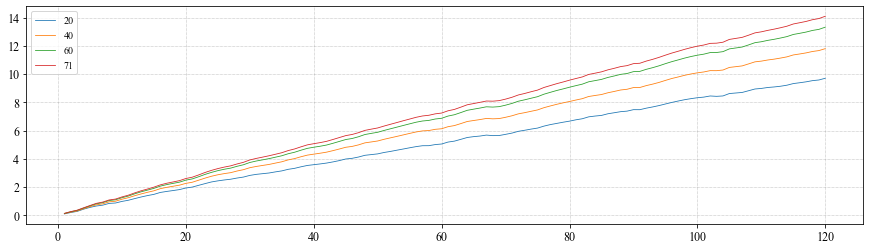

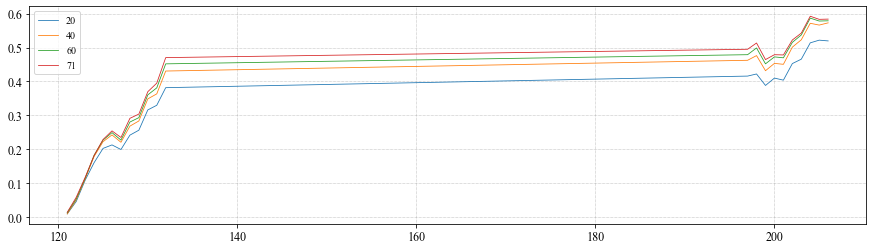

In [124]:
corrByEra.iloc[[20, 40, 60, -1]].sort_index(axis=1).T.cumsum().plot(figsize=(15,4))
val_corrByEra.iloc[[20, 40, 60, -1]].sort_index(axis=1).T.cumsum().plot(figsize=(15,4));

In [133]:
np.argmax(val_corrByEra.mean(axis=1))

70

In [132]:
np.argmax(val_corrByEra.mean(axis=1) / val_corrByEra.std(axis=1))

3

今回の場合、sharpeの最大はfExpがdexに偏っている epoch=3 のモデルで最大となっている.  
corrは低いはずなので謎。単一のfeatureにbetした方がperformance良いの?


---  
### 3. [vs. Importance] exposure

In [151]:
fimp = pd.DataFrame({'fimp': model.feature_importances_,
                     'fexp': val_fexp.loc[MODEL].values,
                     'feature_name': fexp.columns,
                     'feature_category': fexp.columns.str.replace("[0-9]","").str.replace("feature_","")})

In [185]:
fimp.fimp.describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
fimp,310.0,4.064516,4.83806,0.0,1.0,2.0,5.0,29.0


In [153]:
fimp.groupby("feature_category").fimp.describe().round(3).sort_values(by="mean", ascending=False)

,count,mean,std,min,25%,50%,75%,max
feature_category,,,,,,,,
dexterity,14.0,12.643,9.865,1.0,4.25,11.5,19.25,29.0
intelligence,12.0,5.250,2.598,0.0,3.75,5.0,7.00,9.0
strength,38.0,4.289,5.136,0.0,1.00,2.0,6.75,23.0
wisdom,46.0,4.239,4.503,0.0,1.25,3.0,5.00,20.0
charisma,86.0,4.163,4.899,0.0,1.00,3.0,5.75,29.0
constitution,114.0,2.667,2.473,0.0,1.00,2.0,3.00,13.0


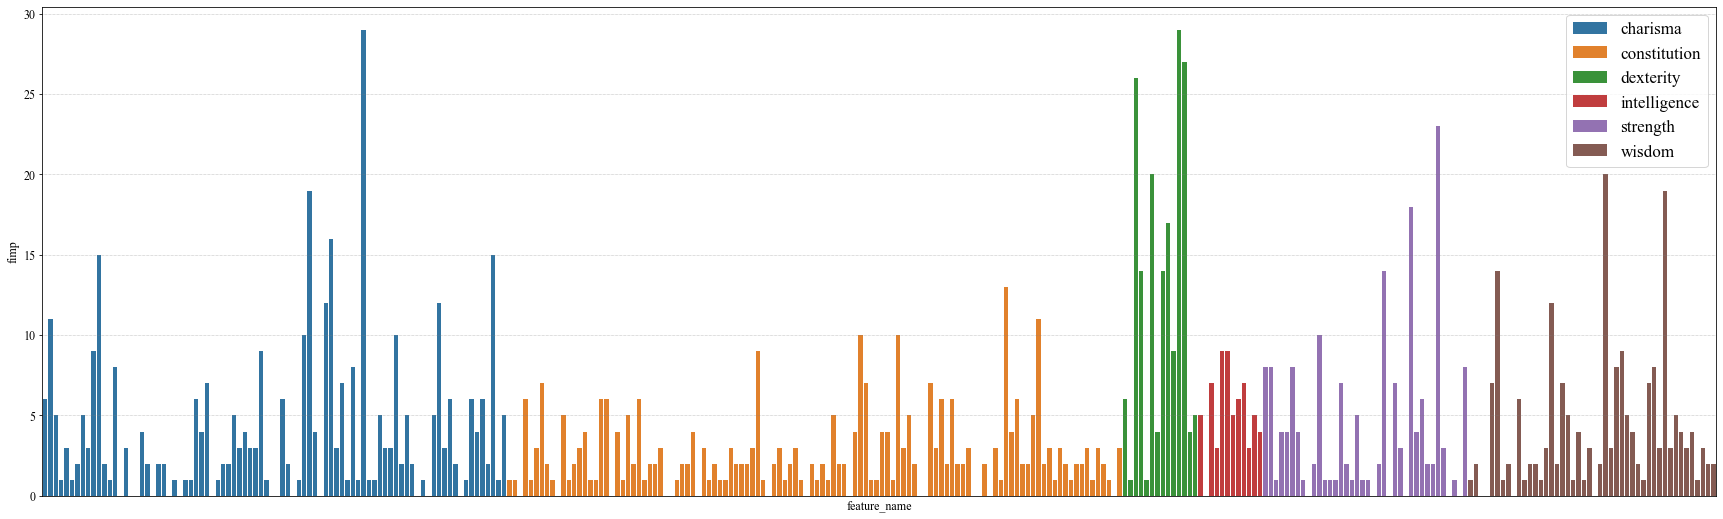

In [182]:
plt.figure(figsize=(30,9))
sns.barplot(x="feature_name", y="fimp", data=fimp, dodge=False, hue="feature_category");
plt.xticks([]); plt.legend(fontsize=17);

- dexの重要度が最高  
- intelligneceは粒ぞろい

重要度が高い特徴量を除いて順次モデルを構築していく -> 全部をstacking とかどうかな  
各カテゴリで重要度上位を取り去って、モデル構築もあり. (各featureには相関があるので)  
もしくは各epochでfExpが低いfeatureのみ使って木を構築する、(eraBoostingならぬ)featureBoosting的な  

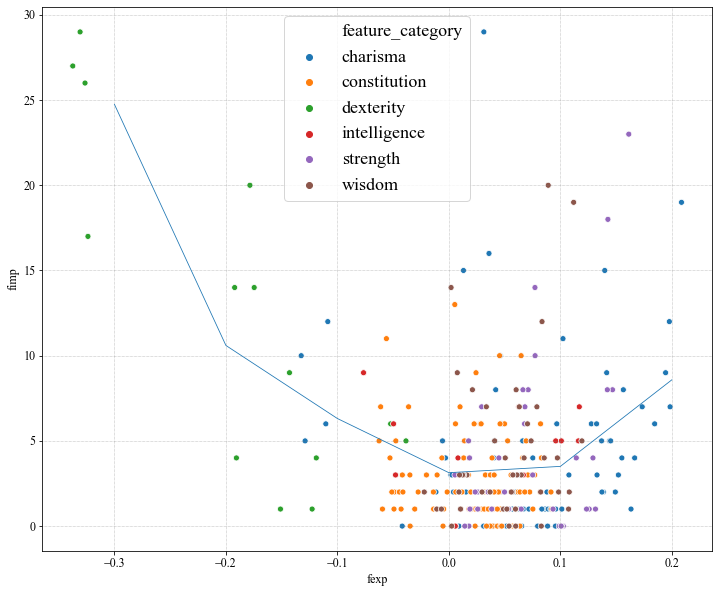

In [181]:
plt.figure(figsize=(12,10))
sns.scatterplot(x=fimp.fexp, y="fimp", data=fimp, hue="feature_category");
sns.lineplot(y="fimp", x="fexp", data=fimp.groupby(fimp.fexp.round(1)).fimp.mean().reset_index())
plt.legend(fontsize=(18));

fExpが高いものは概ねfImpが高い傾向にある. (fExpが高いためにはfImpが高いことが必要条件なきがする)  
逆にfExpが低いにも関わらずfImpが高いものは非線形な効果をモデルに与えている可能性が高いのでは...?

次のモデルで使うfeatureとしてfExpが高いFeatureを削って順次作成とかはどうか

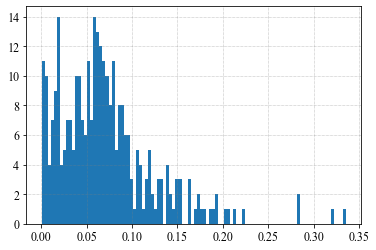

In [197]:
fexp.loc[MODEL].abs().sort_values().hist(bins=100);

In [199]:
fexp.loc[MODEL].abs().quantile(q=0.9)

0.1391537117620603